# 0. Importing Necessary Packages

In [1]:
# Printing the information of Python, IPython, OS, and the generation date.
%load_ext version_information
%version_information

Software versions
Python 3.9.12 64bit [GCC 10.3.0]
IPython 8.2.0
OS Linux 5.8.18 100.fc31.x86_64 x86_64 with glibc2.30
Wed May 25 11:49:20 2022 KST

In [2]:
# Printing the versions of packages
from importlib_metadata import version
for pkg in ['numpy', 'matplotlib', 'astropy', 'pandas', 'pypeit']:
    print(pkg+": ver "+version(pkg))

numpy: ver 1.22.3
matplotlib: ver 3.5.1
astropy: ver 5.0.4
pandas: ver 1.4.2
pypeit: ver 1.8.0


In [3]:
# matplotlib backend
%matplotlib notebook

# importing necessary modules
import numpy as np
import glob, os
from matplotlib import pyplot as plt
from astropy.io import fits
import pandas as pd

# 1. Setup

### [Reference link](https://pypeit.readthedocs.io/en/release/setup.html#pypeit-setup)

In [4]:
current_dir = os.getcwd()    # Current path
dir_raw = "/data/jlee/DATA/TA/2022A/Class5/raw_dataset/"    # Raw data path
dir_reduce = "/data/jlee/DATA/TA/2022A/Class5/reduction/"    # Reduction path
os.chdir(dir_reduce)

In [5]:
# Viewing the help document of pypeit functions
os.system("pypeit_setup -h")    # OR you can run the "pypeit_setup -h" in the terminal with pypeit activated

usage: pypeit_setup [-h] [-s SPECTROGRAPH] [-r ROOT] [-e EXTENSION]
                    [-d OUTPUT_PATH] [-o] [-c CFG_SPLIT] [-b] [-m]
                    [-v VERBOSITY]

Parse data files to construct a pypeit file in preparation for reduction using
'run_pypeit'

optional arguments:
  -h, --help            show this help message and exit
  -s SPECTROGRAPH, --spectrograph SPECTROGRAPH
                        A valid spectrograph identifier: bok_bc,
                        gemini_flamingos1, gemini_flamingos2,
                        gemini_gmos_north_e2v, gemini_gmos_north_ham,
                        gemini_gmos_north_ham_ns, gemini_gmos_south_ham,
                        gemini_gnirs, gtc_osiris, keck_deimos, keck_hires_red,
                        keck_kcwi, keck_lris_blue, keck_lris_blue_orig,
                        keck_lris_red, keck_lris_red_mark4,
                        keck_lris_red_orig, keck_mosfire, keck_nires,
                        keck_nirspec_low, lbt_luci1, lbt_luci2

0

### 1) Initial setup (Creating ``*.pypeit`` files)

#### ``*.pypeit`` files list the key information of all data frames and are used as input files for calibration process.

In [6]:
spectrograph = "gemini_gmos_north_ham"    # Please give this name correctly! (Refer to the above help document.)
os.system("pypeit_setup -r "+dir_raw+" -s "+spectrograph+" -c all")

[INFO]    :: A vanilla pypeit file will be written to: /data/jlee/DATA/TA/2022A/Class5/reduction/setup_files/gemini_gmos_north_ham_2022-05-25.pypeit
[INFO]    :: PypeIt file written to: /data/jlee/DATA/TA/2022A/Class5/reduction/setup_files/gemini_gmos_north_ham_2022-05-25.pypeit
[INFO]    :: Loading the reduction file
[INFO]    :: Found 30 raw data frames
[WARNING] :: Missing setup block! This may be a problem
[INFO]    :: Input file loaded successfully
[INFO]    :: Added metadata for N20170414S0121.fits
[INFO]    :: Added metadata for N20170527S0431.fits
[INFO]    :: Added metadata for N20170527S0558.fits
[INFO]    :: Added metadata for N20170527S0432.fits
[INFO]    :: Added metadata for N20170527S0114.fits
[INFO]    :: Added metadata for N20170414S0182.fits
[INFO]    :: Added metadata for N20170522S0320.fits
[INFO]    :: Added metadata for N20170414S0185.fits
[INFO]    :: Added metadata for N20170627S0447.fits
[INFO]    :: Added metadata for N20170626S0136.fits
[INFO]    :: Added met

0

In [7]:
dir_setup = sorted(glob.glob("./"+spectrograph+"*"))
dir_setup

['./gemini_gmos_north_ham_A', './gemini_gmos_north_ham_B']

* __These setup use the grating ``B600`` in Gemini GMOS-North ([grating information](http://www.gemini.edu/instrumentation/gmos/components#Gratings)).__
* ``gemini_gmos_north_ham_A`` shows the spectroscopic configuration centered on 5400 Angstrom.
* ``gemini_gmos_north_ham_B`` shows the spectroscopic configuration centered on 5450 Angstrom.

#### Our goal is to process two setups and combine them to a 1d spectrum of NGC 4305 galaxy.

### 2) Revising the Initial Setup

### [Reference link](https://pypeit.readthedocs.io/en/release/pypeit_file.html)

#### ``*.pypeit.new`` contains the updated settings as below.

* __Move some bias frames (``N20170627S0[447-451].fits``) from setup A (``*A.pypeit``) to B (``*B.pypeit``).__
* **In setup A, change 'frametype' of ``N20170522S0107_bin2.fits`` from 'science' to 'standard'.**
    * This is because ``N20170522S0107_bin2.fits`` observes EG131, a standard star of this program.

In [8]:
for i, d in enumerate(dir_setup):
    pypeit_name = d.split("/")[-1]+".pypeit"
#     print(pypeit_name)
    os.chdir(d)
    os.system("cp -rpv "+pypeit_name+" "+pypeit_name+".old")
    os.system("cp -rpv "+pypeit_name+".new "+pypeit_name)
    os.chdir(dir_reduce)

'gemini_gmos_north_ham_A.pypeit' -> 'gemini_gmos_north_ham_A.pypeit.old'
'gemini_gmos_north_ham_A.pypeit.new' -> 'gemini_gmos_north_ham_A.pypeit'
'gemini_gmos_north_ham_B.pypeit' -> 'gemini_gmos_north_ham_B.pypeit.old'
'gemini_gmos_north_ham_B.pypeit.new' -> 'gemini_gmos_north_ham_B.pypeit'


# 2. Main run of pypeit

### [Reference link](https://pypeit.readthedocs.io/en/release/running.html)

### For the main processing (bias subtraction, flat fielding, wavelength calibration, etc.), please uncomment the below cell and run it.
#### (takes ~ 40 min)

In [9]:
# for i, d in enumerate(dir_setup):
#     pypeit_name = d.split("/")[-1]+".pypeit"
#     os.chdir(d)
#     os.system("run_pypeit "+pypeit_name+" -o")
#     os.chdir(dir_reduce)

# 3. Flux calibration (using standard star frame)

### [Reference link](https://pypeit.readthedocs.io/en/release/fluxing.html)

### 1) Creating sensitivity function FITS file

In [10]:
standard = "EG131"
sens_out = standard+"_sens.fits"
for i, d in enumerate(dir_setup):
    os.chdir(d+"/Science")
    if (glob.glob("spec1d*"+standard+"*.fits") != []):
#         print(sorted(glob.glob("spec1d*"+standard+"*.fits")))
        spec1d_std = glob.glob("spec1d*"+standard+"*.fits")[0]
#         print("pypeit_sensfunc "+spec1d_std+" -o "+sens_out)
        os.system("pypeit_sensfunc "+spec1d_std+" -o "+sens_out)
        os.system("cp -rpv "+sens_out+" "+dir_reduce+"/")
    os.chdir(dir_reduce)

[INFO]    :: Getting archival standard spectrum
[INFO]    :: Loading standard star file: /home/jlee/anaconda3/envs/pypeit/lib/python3.9/site-packages/pypeit/data/standards/noao/meg131.dat
[INFO]    :: Fluxes are flambda, normalized to 1e-17
[INFO]    :: Applying extinction correction
[INFO]    :: Using mkoextinct.dat for extinction corrections.
[INFO]    :: Extinction data covered the whole spectra. Applying correction...
[INFO]    ::  Masking bad pixels
[INFO]    ::  Masking edges
[INFO]    ::  Masking Below the atmospheric cutoff
[INFO]    :: Masking recombination lines:
[INFO]    ::  Masking Balmer
[INFO]    ::  Masking Paschen
[INFO]    ::  Masking Brackett
[INFO]    ::  Masking Pfund
[INFO]    :: Your spectrum is bluer than 9100A, only optical telluric regions are masked.
[INFO]    :: Initialize bspline for flux calibration
[INFO]    :: Bspline fit on zeropoint. 
[INFO]    :: File written to: EG131_sens.fits


Writing the parameters to sensfunc.par
'EG131_sens.fits' -> '/data/jlee/DATA/TA/2022A/Class5/reduction/EG131_sens.fits'


### 2) Applying the sensitivity function to the processed frames

In [11]:
objname = "NGC4305"
f = open("flux_file.txt","w")
f.write("flux read\n")
for i, d in enumerate(dir_setup):
    obj1d_list = sorted(glob.glob(d+"/Science/spec1d*"+objname+"*.fits"))
    for j, l in enumerate(obj1d_list):
        if ((i == 0) & (j == 0)):
            f.write(" "+l+" "+sens_out+"\n")
        else:
            f.write(" "+l+"\n")
f.write("flux end\n")
f.close()

# Writing the following text file
'''
flux read
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0120-NGC4305_GMOS-N_18640526T064802.428.fits EG131_sens.fits
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0121-NGC4305_GMOS-N_18640526T064805.031.fits
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0113-NGC4305_GMOS-N_18640526T093738.820.fits
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0114-NGC4305_GMOS-N_18640526T093741.425.fits
 ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0137-NGC4305_GMOS-N_18640526T113553.685.fits
 ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0138-NGC4305_GMOS-N_18640526T113556.291.fits
flux end
'''

'\nflux read\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0120-NGC4305_GMOS-N_18640526T064802.428.fits EG131_sens.fits\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0121-NGC4305_GMOS-N_18640526T064805.031.fits\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0113-NGC4305_GMOS-N_18640526T093738.820.fits\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0114-NGC4305_GMOS-N_18640526T093741.425.fits\n ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0137-NGC4305_GMOS-N_18640526T113553.685.fits\n ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0138-NGC4305_GMOS-N_18640526T113556.291.fits\nflux end\n'

In [12]:
os.system("pypeit_flux_calib flux_file.txt")

[INFO]    :: Loading the fluxcalib file
[INFO]    :: Loading SensFunc from EG131_sens.fits
[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 821.3184903860092
SPAT_FRACPOS: True
trace_spec: True
maskwidth: True
WAVE_RMS: True
SLITID: 1074


[INFO]    :: Wrote 1D spectra to ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0120-NGC4305_GMOS-N_18640526T064802.428.fits
[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 1624.347013384104
SPAT_FRACPOS: True
trace_spec: True
maskwi

[INFO]    :: Wrote 1D spectra to ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0121-NGC4305_GMOS-N_18640526T064805.031.fits
[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 828.158618196845
SPAT_FRACPOS: True
trace_spec: True
maskwid

[INFO]    :: Wrote 1D spectra to ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0113-NGC4305_GMOS-N_18640526T093738.820.fits
[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 135.941543340683
SPAT_FRACPOS: True
trace_spec: True
maskwid

[INFO]    :: Extinction data covered the whole spectra. Applying correction...
[INFO]    ::  Masking bad pixels
[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 1631.269855499268
SPAT_FRACPOS: True
trace_spec: True
maskwidth: True
WAVE_RM

[INFO]    :: Wrote 1D spectra to ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0114-NGC4305_GMOS-N_18640526T093741.425.fits
[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 708.7726694196463
SPAT_FRACPOS: True
trace_spec: True
maskwi

[INFO]    :: Extinction data covered the whole spectra. Applying correction...
[INFO]    ::  Masking bad pixels
[INFO]    :: Wrote 1D spectra to ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0137-NGC4305_GMOS-N_18640526T113553.685.fits


[INFO]    :: Fluxing BOX extraction for:
             <SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_FLAM: True
OPT_FLAM_SIG: True
OPT_FLAM_IVAR: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_COUNTS_NIVAR: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_COUNTS_SIG_DET: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_FLAM: True
BOX_FLAM_SIG: True
BOX_FLAM_IVAR: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_COUNTS_NIVAR: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_COUNTS_SIG_DET: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: MSC01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 128.5796666741371
SPAT_FRACPOS: True
trace_spec: True
maskwidth: True
WAVE_RMS: True
SLITID: 387
OBJID: True
NAME: SPAT0129-SLIT0387-MSC01
hand_extract_flag: True
>
[INFO]    :: Applying ex

[INFO]    :: Wrote 1D spectra to ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0138-NGC4305_GMOS-N_18640526T113556.291.fits
[INFO]    :: Flux calibration complete


Writing the parameters to fluxing.par


0

# 4. Combining all science frames to a 1D spectrum

### [Reference link](https://pypeit.readthedocs.io/en/release/coadd1d.html)

In [13]:
coaddfile = "NGC4305_coadd.fits"
f = open("coadd1d_file.txt","w")
f.write("[coadd1d]\n")
f.write(" coaddfile = '"+coaddfile+"'\n\n")
f.write("coadd1d read\n")
for i, d in enumerate(dir_setup):
    obj1d_list = sorted(glob.glob(d+"/Science/spec1d*"+objname+"*.fits"))
    obj1d_text = sorted(glob.glob(d+"/Science/spec1d*"+objname+"*.txt"))
    for j, l in enumerate(obj1d_list):
        df = pd.read_csv(obj1d_text[j], sep="|", usecols=(2,7), names=("name", "s2n"), header=0)
        slitname = df.iloc[np.argmax(df['s2n'].values)]['name'].strip()
        f.write(" "+l+" "+slitname+"\n")
f.write("coadd1d end\n")
f.close()

# Writing the following text file
'''
[coadd1d]
 coaddfile = 'NGC4305_coadd.fits'

coadd1d read
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0120-NGC4305_GMOS-N_18640526T064802.428.fits SPAT1113-SLIT1074-MSC01
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0121-NGC4305_GMOS-N_18640526T064805.031.fits SPAT1917-SLIT1761-MSC01
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0113-NGC4305_GMOS-N_18640526T093738.820.fits SPAT1120-SLIT1074-MSC01
 ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0114-NGC4305_GMOS-N_18640526T093741.425.fits SPAT1924-SLIT1761-MSC01
 ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0137-NGC4305_GMOS-N_18640526T113553.685.fits SPAT1112-SLIT1074-MSC01
 ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0138-NGC4305_GMOS-N_18640526T113556.291.fits SPAT1916-SLIT1761-MSC01
coadd1d end
'''

"\n[coadd1d]\n coaddfile = 'NGC4305_coadd.fits'\n\ncoadd1d read\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0120-NGC4305_GMOS-N_18640526T064802.428.fits SPAT1113-SLIT1074-MSC01\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170414S0121-NGC4305_GMOS-N_18640526T064805.031.fits SPAT1917-SLIT1761-MSC01\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0113-NGC4305_GMOS-N_18640526T093738.820.fits SPAT1120-SLIT1074-MSC01\n ./gemini_gmos_north_ham_A/Science/spec1d_N20170527S0114-NGC4305_GMOS-N_18640526T093741.425.fits SPAT1924-SLIT1761-MSC01\n ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0137-NGC4305_GMOS-N_18640526T113553.685.fits SPAT1112-SLIT1074-MSC01\n ./gemini_gmos_north_ham_B/Science/spec1d_N20170626S0138-NGC4305_GMOS-N_18640526T113556.291.fits SPAT1916-SLIT1761-MSC01\ncoadd1d end\n"

#### Do not mind the WARNING...

In [14]:
os.system("pypeit_coadd_1dspec coadd1d_file.txt --show")

[INFO]    :: Loading the coadd1d file
[INFO]    :: Using a sn_smooth_npix=314 to decide how to scale and weight your spectra
[INFO]    :: Using wavelength dependent weights for coadding, S/N = 49.94, weight = 3009.46 for 0th exposure
[INFO]    :: Using wavelength dependent weights for coadding, S/N = 39.68, weight = 1963.92 for 1th exposure
[INFO]    :: Using wavelength dependent weights for coadding, S/N = 96.31, weight = 10823.17 for 2th exposure
[INFO]    :: Using wavelength dependent weights for coadding, S/N = 107.94, weight = 13163.82 for 3th exposure
[INFO]    :: Using wavelength dependent weights for coadding, S/N = 90.36, weight = 9120.16 for 4th exposure
[INFO]    :: Using wavelength dependent weights for coadding, S/N = 104.03, weight = 12112.82 for 5th exposure
[WARNING] :: Maximum number of iterations maxiter=3 reached in robust_optimize
[WARNING] :: Maximum number of iterations maxiter=3 reached in robust_optimize
[WARNING] :: Maximum number of iterations maxiter=3 reache

Writing the parameters to coadd1d.par


0

<IPython.core.display.Javascript object>


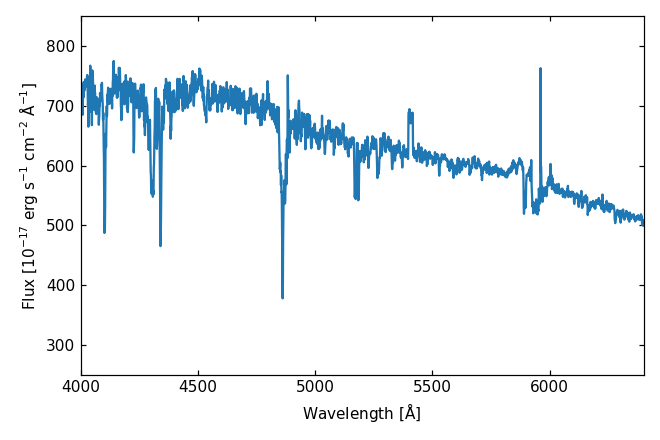

In [15]:
hdul = fits.open(coaddfile)
data = hdul[1].data

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(data['wave'], data['flux'], '-')
ax.set_xlabel(r"Wavelength [${\rm \AA}$]")
ax.set_ylabel(r"Flux [$10^{-17}~{\rm erg~s^{-1}~cm^{-2}~\AA^{-1}}$]")
ax.set_xlim([4000, 6400])
ax.set_ylim([250, 850])
plt.tight_layout()